In [1]:
import numpy as np
import pandas as pd
import itertools
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.arima.model import ARIMA

In [2]:
timeseries = pd.read_csv('COEBTM_set.csv', header=0,delimiter=',')
timeseries.head()

,Period,Year,Month,Oil Type,Volume (m3/d),Volume (bbl/d)
0,06/01/1985,1985,June,Light,28019.093333,176320.147616
1,06/01/1985,1985,June,Medium,14596.950000,91856.518986
2,06/01/1985,1985,June,Heavy,22124.423333,139225.832244
3,06/01/1985,1985,June,Total,64740.466666,407402.498847
4,07/01/1985,1985,July,Light,25181.764516,158465.243108


In [3]:
timeseries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1835 entries, 0 to 1834
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Period          1835 non-null   object 
 1   Year            1835 non-null   int64  
 2   Month           1835 non-null   object 
 3   Oil Type        1835 non-null   object 
 4   Volume (m3/d)   1835 non-null   float64
 5   Volume (bbl/d)  1835 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 86.1+ KB


In [4]:
timeseries.describe()

,Year,Volume (m3/d),Volume (bbl/d)
count,1835.000000,1835.000000,1.835000e+03
mean,2004.126975,151672.202045,9.544515e+05
std,11.149412,156852.230797,9.870487e+05
min,1985.000000,0.061290,3.856910e-01
25%,1994.000000,34057.537096,2.143192e+05
50%,2004.000000,102904.226333,6.475616e+05
75%,2014.000000,202356.840940,1.273403e+06
max,2023.000000,662436.764450,4.168620e+06


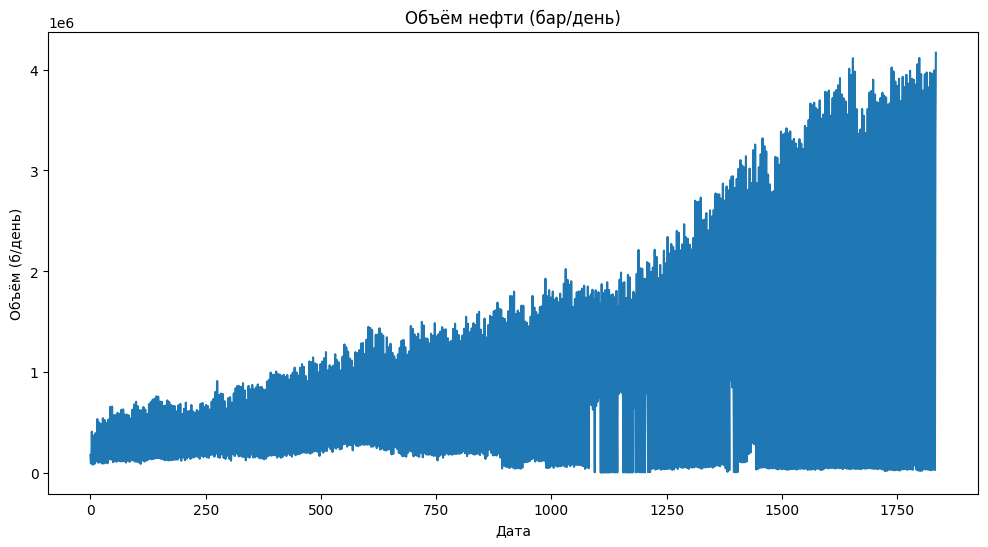

In [5]:
plt.figure(figsize=(12,6))
plt.plot(timeseries['Volume (bbl/d)'])
plt.title('Объём нефти (бар/день)')
plt.xlabel('Дата')
plt.ylabel('Объём (б/день)')
plt.show()

In [6]:
from statsmodels.tsa.stattools import adfuller
res=adfuller(timeseries['Volume (bbl/d)'])
print('p-value:',res[1])

p-value: 0.9788373605742716


In [7]:
timeseries = timeseries.loc[timeseries['Oil Type']=='Total'].filter(['Period','Volume (bbl/d)'])
timeseries['Period'] = timeseries['Period'].transform(lambda x: datetime.strptime(x, '%m/%d/%Y'))
timeseries.set_index(keys='Period',drop=True, inplace=True)
timeseries = timeseries.squeeze(axis=1)
timeseries

,Volume (bbl/d)
Period,
1985-06-01,4.074025e+05
1985-07-01,3.680593e+05
1985-08-01,3.925685e+05
1985-09-01,5.325918e+05
1985-10-01,4.984505e+05
...,...
2023-07-01,3.825831e+06
2023-08-01,3.971594e+06
2023-09-01,3.958958e+06


<Axes: xlabel='Period'>

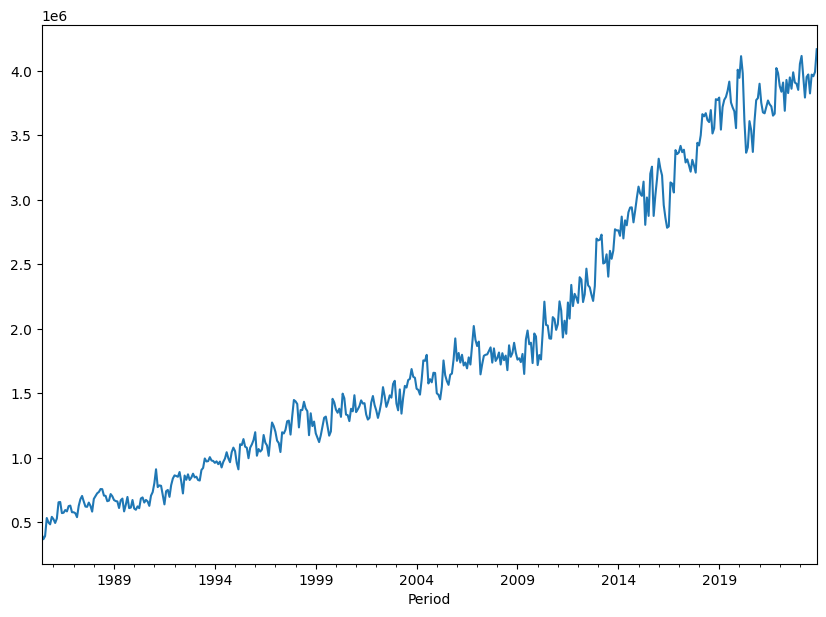

In [8]:
timeseries.plot(figsize=(10, 7))

## Подбор параметров регрессии

In [9]:
#import warnings
#warnings.filterwarnings("ignore")

p = range(0,10)
d = q = range(0,3)
pdq = list(itertools.product(p, d, q))
best_pdq = (0,0,0)
best_aic = np.inf
for params in pdq:
  model_test = ARIMA(timeseries, order = params)
  result_test = model_test.fit()
  if result_test.aic < best_aic:
    best_pdq = params
    best_aic = result_test.aic
print(best_pdq, best_aic)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

(4, 2, 2) 14.0


In [10]:
model_best = ARIMA(timeseries, order=best_pdq)
res_best = model_best.fit()
res_best.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Volume (bbl/d)   No. Observations:                  462
Model:                 ARIMA(4, 2, 2)   Log Likelihood                   0.000
Date:                Sat, 22 Mar 2025   AIC                             14.000
Time:                        12:17:13   BIC                             42.919
Sample:                    06-01-1985   HQIC                            25.388
                         - 11-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0009         -0       -inf      0.000       0.001       0.001
ar.L2          1.9991   5.12e-08    3.9e+07      0.000       1.999       1.999
ar.L3         -0.0009   5.41e-09   -1.6e+05      0.000      -0.001      -0.001
ar.L4         -0.9991         -0        inf      0.000      -0.999      -0.999
ma.L1         -2.0000         -0        inf      0.000      -2.000      -2.000
ma.L2          1.0000         -0       -inf      0.000       1.000       1.000
sigma2      1.266e+10         -0       -inf      0.000    1.27e+10    1.27e+10
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [11]:
model = ARIMA(timeseries, order=(9,2,1)) #order=(9,2,1) #best_pdq
result = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [12]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Volume (bbl/d)   No. Observations:                  462
Model:                 ARIMA(9, 2, 1)   Log Likelihood               -5948.304
Date:                Sat, 22 Mar 2025   AIC                          11918.608
Time:                        12:17:21   BIC                          11964.051
Sample:                    06-01-1985   HQIC                         11936.502
                         - 11-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3616      0.051     -7.152      0.000      -0.461      -0.262
ar.L2         -0.2855      0.055     -5.236      0.000      -0.392      -0.179
ar.L3         -0.2963      0.058     -5.114      0.000      -0.410      -0.183
ar.L4         -0.3503      0.052     -6.743      0.000      -0.452      -0.248
ar.L5         -0.2325      0.054     -4.305      0.000      -0.338      -0.127
ar.L6         -0.1386      0.065     -2.147      0.032      -0.265      -0.012
ar.L7         -0.1285      0.059     -2.177      0.029      -0.244      -0.013
ar.L8         -0.1772      0.056     -3.158      0.002      -0.287      -0.067
ar.L9         -0.1232      0.053     -2.315      0.021      -0.228      -0.019
ma.L1         -0.9905      0.008   -123.015      0.000      -1.006      -0.975
sigma2      1.204e+10   1.77e-12   6.79e+21      0.000     1.2e+10     1.2e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                35.22
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               4.30   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.69e+36. Standard errors may be unstable.
"""

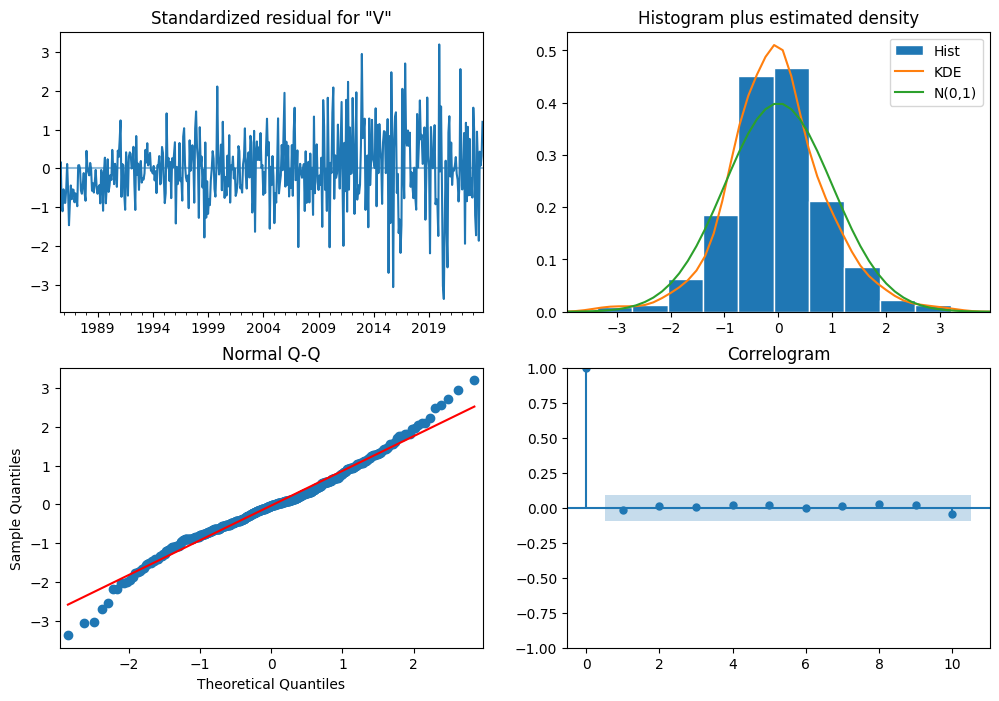

In [13]:
result.plot_diagnostics(figsize=(12, 8))
plt.show()

In [14]:
pred = result.get_prediction(start='2010-01-01', end='2020-01-01', dynamic=False)
pred_ci = pred.conf_int()
pred_ci

,lower Volume (bbl/d),upper Volume (bbl/d)
2010-01-01,1.727031e+06,2.157132e+06
2010-02-01,1.566123e+06,1.996224e+06
2010-03-01,1.560444e+06,1.990544e+06
2010-04-01,1.602021e+06,2.032122e+06
2010-05-01,1.766855e+06,2.196955e+06
...,...,...
2019-09-01,3.588570e+06,4.018657e+06
2019-10-01,3.569355e+06,3.999442e+06
2019-11-01,3.532903e+06,3.962990e+06
2019-12-01,3.444050e+06,3.874137e+06


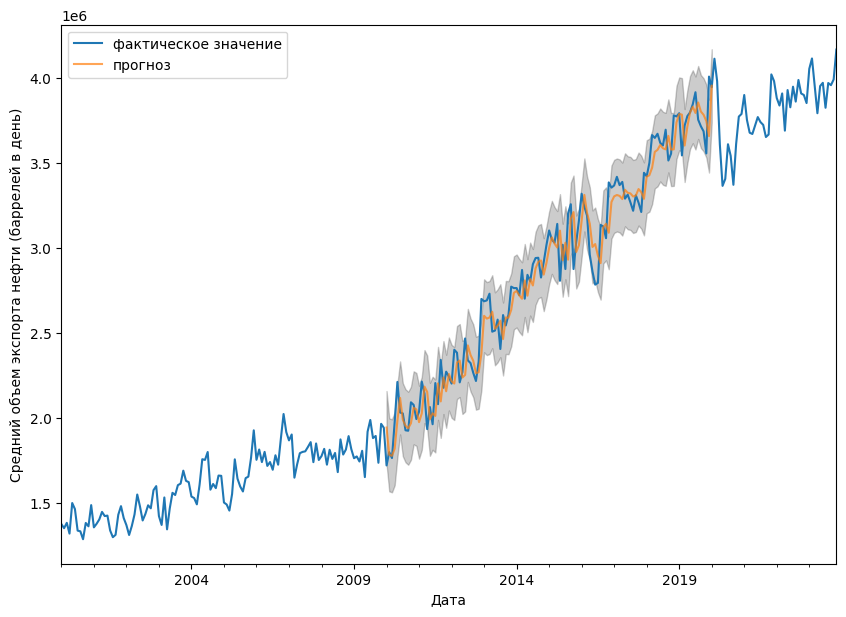

In [15]:
ax = timeseries['2000':].plot(label='фактическое значение', figsize=(10, 7))
pred.predicted_mean.plot(ax=ax, label='прогноз', alpha=.7)
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Дата')
ax.set_ylabel('Средний объем экспорта нефти (баррелей в день)')
plt.legend()
plt.show()

#Получение прогнозируемых значений

In [16]:
forecasted = pred.predicted_mean[:'2021-03-01']
actual = timeseries['2000':]
mape = np.mean(np.abs((actual - forecasted)/actual))*100
mape.round(2)

np.float64(3.66)